<a href="https://colab.research.google.com/github/neelsoumya/ml-unsupervised/blob/main/teaching_25thNov2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [22]:
!pip install pandas numpy scikit-learn seaborn matplotlib scanpy pca


# Load data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

github_url = "https://raw.githubusercontent.com/cambiotraining/ml-unsupervised/main/course_files/data/diabetes_sample_data.csv"

# diabetes data
diabetes_data = pd.read_csv(github_url)

# print some information
print(diabetes_data.head())
print(diabetes_data.describe())



   patient_id   age  glucose   bmi  blood_pressure  diabetes
0           1  62.5     97.5  29.8            71.7         0
1           2  52.9    127.4  30.8            74.4         0
2           3  64.7    129.7  33.4            87.5         0
3           4  77.8    115.9  33.3            86.1         1
4           5  51.5    135.2  21.1            79.8         1
       patient_id         age     glucose         bmi  blood_pressure  \
count  100.000000  100.000000  100.000000  100.000000      100.000000   
mean    50.500000   53.444000  140.670000   28.322000       81.066000   
std     29.011492   13.625024   28.611669    5.425223        8.842531   
min      1.000000   15.700000   82.400000   11.800000       58.800000   
25%     25.750000   46.000000  115.800000   24.700000       74.350000   
50%     50.500000   53.100000  142.550000   28.500000       80.500000   
75%     75.250000   61.075000  156.175000   31.500000       86.825000   
max    100.000000   82.800000  221.600000   47.300

# Plotting

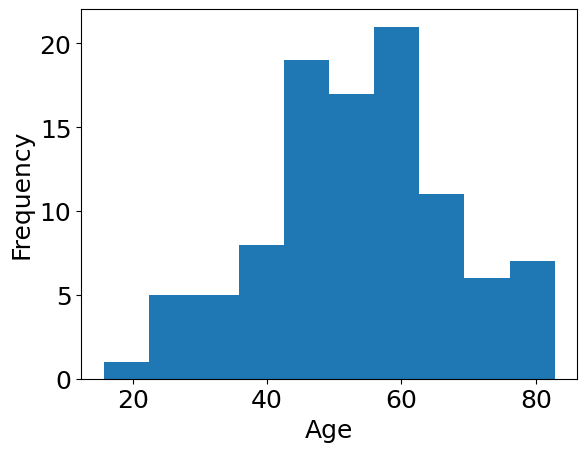

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure()
plt.hist(diabetes_data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('hist.png', dpi=300)

# PCA hands-on

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load US Arrests data

In [26]:
url = "https://raw.githubusercontent.com/cambiotraining/ml-unsupervised/main/course_files/data/USArrests.csv"

X = pd.read_csv(url, index_col=0)

print(X.head())


            Murder  Assault  UrbanPop  ViolentCrime
State                                              
Alabama       13.2      236        58          21.2
Alaska        10.0      263        48          44.5
Arizona        8.1      294        80          31.0
Arkansas       8.8      190        50          19.5
California     9.0      276        91          40.6


# Normalize the data

In [27]:
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)

# Perform PCA

In [28]:
pca_fn = PCA()
X_pca = pca_fn.fit_transform(X_scaled)


# Plots

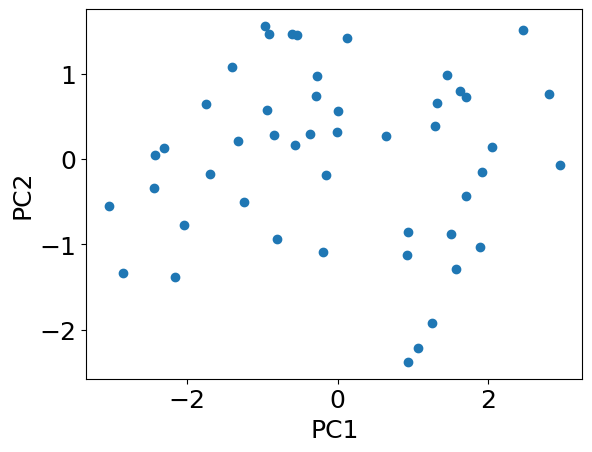

In [29]:
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Plot labels

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia'],
      dtype='object', name='State')


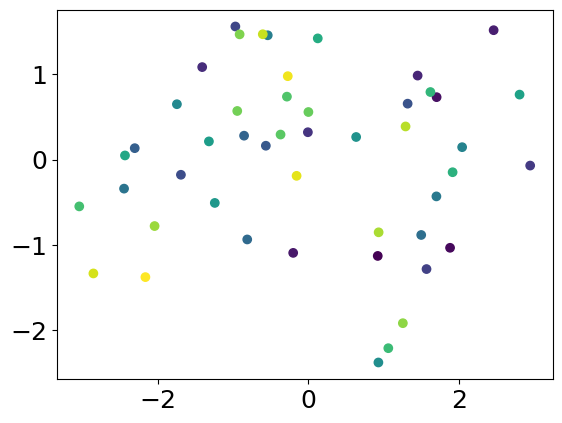

In [30]:
print(X.index)

states = X.index

colour_code_states = pd.Categorical(states).codes

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c = colour_code_states)
plt.show()


# Text labels in plot

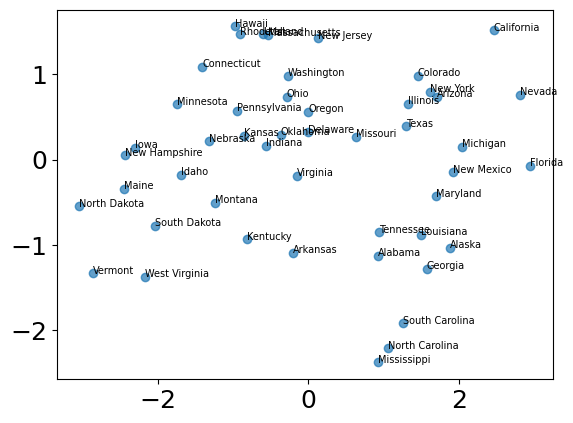

In [31]:
fig, ax = plt.subplots()

ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.7)

for i, state in enumerate(X.index):
  ax.text(X_pca[i,0], X_pca[i,1], state, fontsize = 7)

plt.show()

# Use the pca package

In [32]:
!pip install pca
from pca import pca

url = "https://raw.githubusercontent.com/cambiotraining/ml-unsupervised/main/course_files/data/USArrests.csv"

df = pd.read_csv(url, index_col = 0)





# Normalize and perform PCA

[27-11-2025 13:35:54] [pca.pca] [INFO] Extracting column labels from dataframe.
[27-11-2025 13:35:54] [pca.pca] [INFO] Extracting row labels from dataframe.
[27-11-2025 13:35:54] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[27-11-2025 13:35:54] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 4 columns of the input data.
[27-11-2025 13:35:54] [pca.pca] [INFO] Fit using PCA.
[27-11-2025 13:35:54] [pca.pca] [INFO] Compute loadings and PCs.
[27-11-2025 13:35:54] [pca.pca] [INFO] Compute explained variance.
[27-11-2025 13:35:54] [pca.pca] [INFO] The top 3 principal component(s) explains >= 95.00% of the explained variance.
[27-11-2025 13:35:54] [pca.pca] [INFO] The PCA reduction is performed on 4 variables (columns) of the input dataframe.
[27-11-2025 13:35:54] [pca.pca] [INFO] Fit using PCA.
[27-11-2025 13:35:54] [pca.pca] [INFO] Compute loadings and PCs.
[27-11-2025 13:35:54] [pca.pca] [INFO] Outlier detec

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance.\n The top 3 Principal Component(s) explains [95.53%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

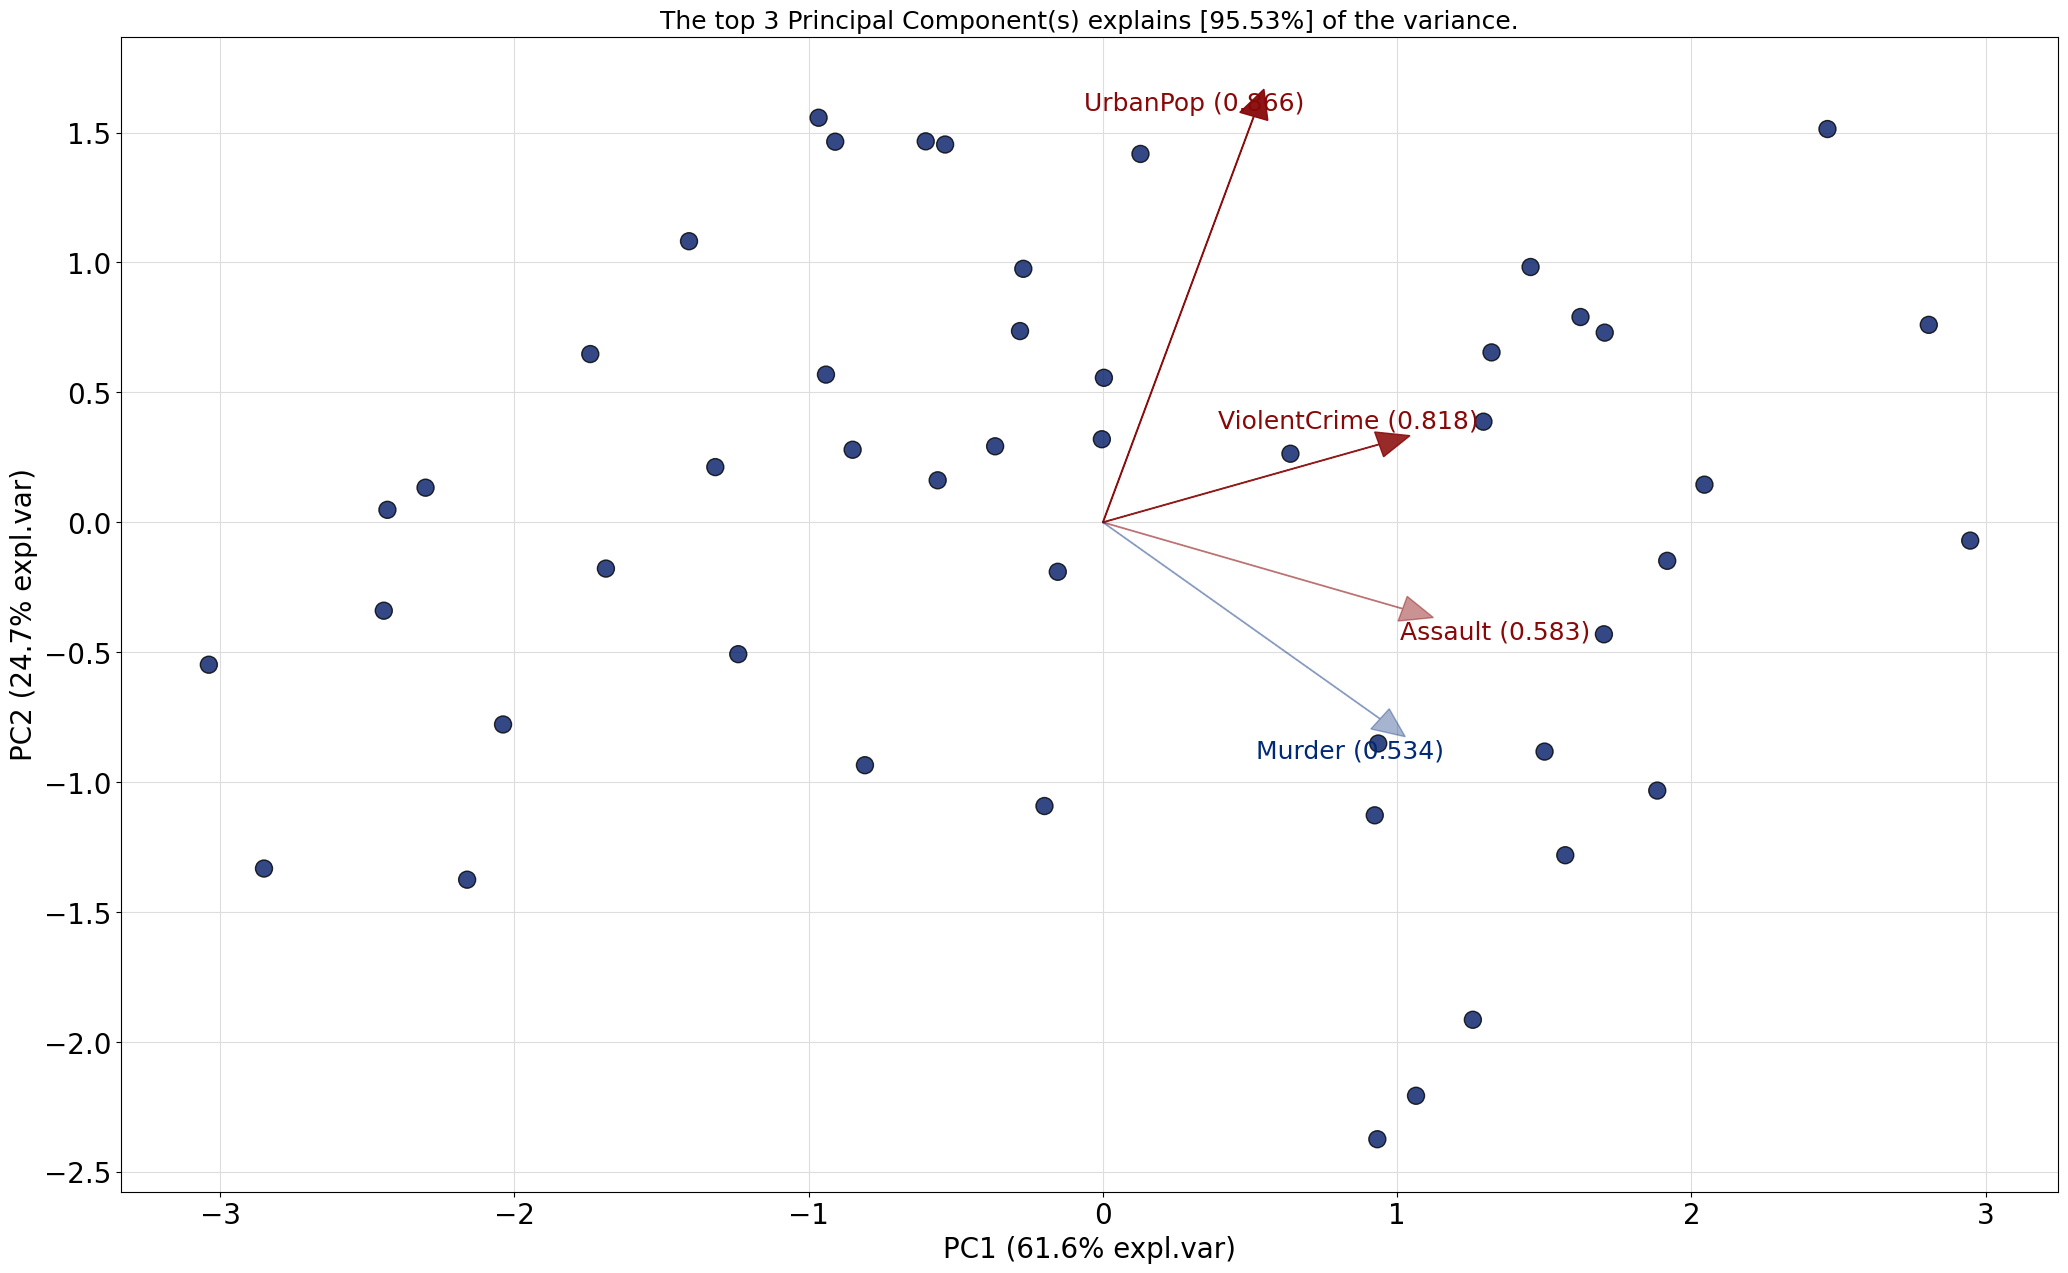

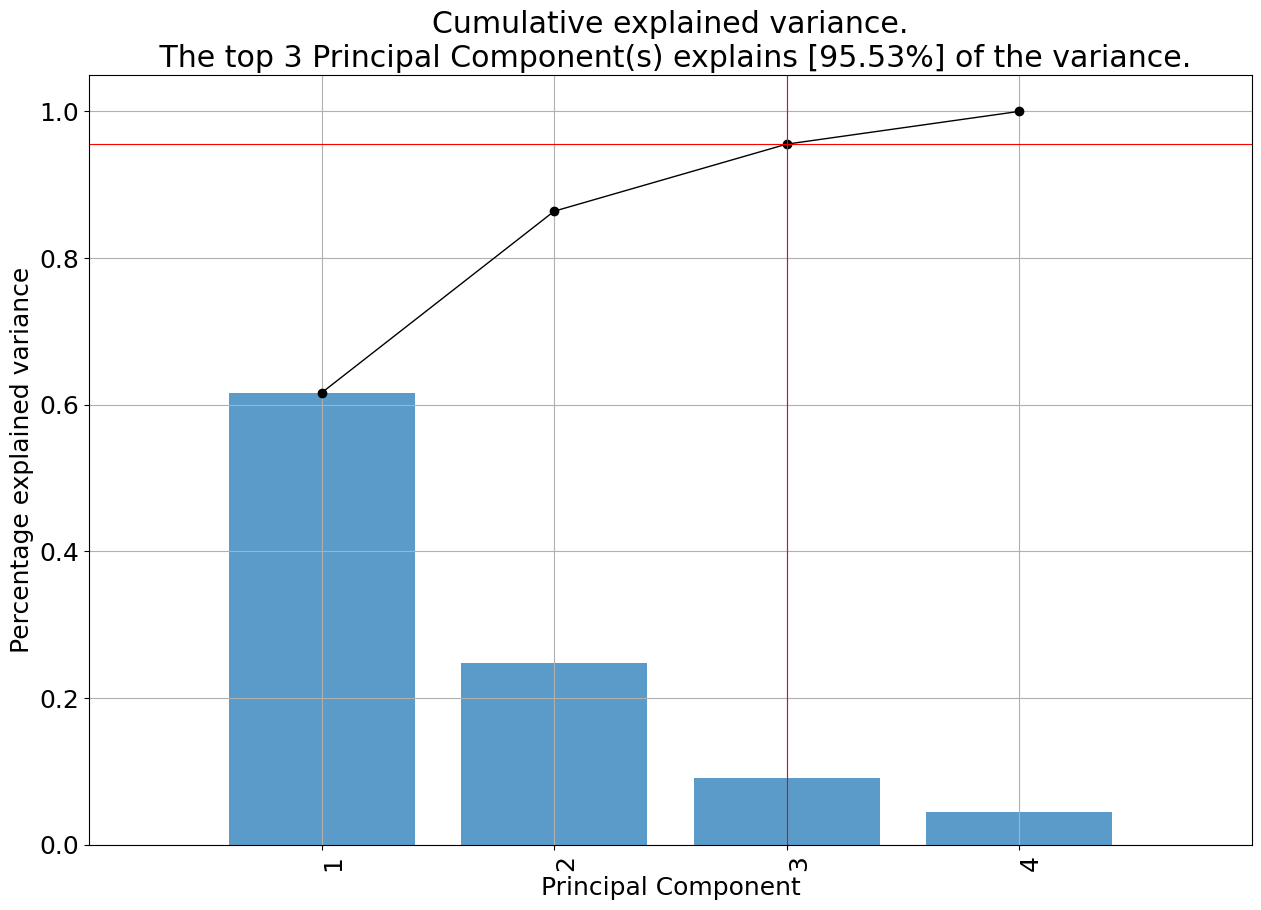

In [33]:
model = pca(normalize = True)
out = model.fit_transform(df)
model.biplot()
model.plot()

# tSNE practical

In [34]:
from sklearn import datasets
from sklearn.manifold import TSNE


# Load data

In [35]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# create a data frame
df_iris_simple = pd.DataFrame(X,
                              columns = iris.feature_names
                              )

print(df_iris_simple)

df_iris_simple['species'] = iris.target
df_iris_simple['species_name'] = df_iris_simple['species'].map( {0:'setosa', 1: 'versicolor', 2: 'viriginica'} )

print(df_iris_simple)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

# Plotting

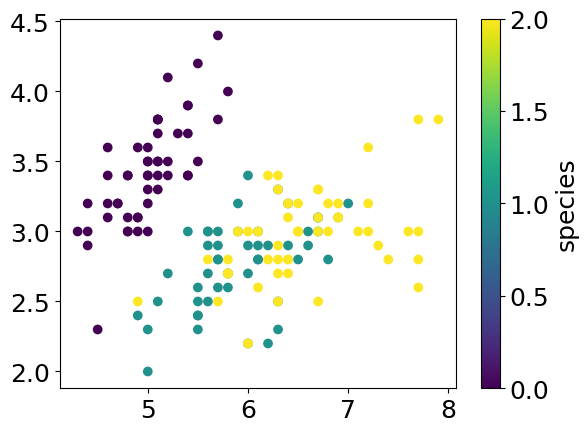

In [36]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = iris.target)
plt.colorbar(label = 'species')
plt.show()

# tSNE

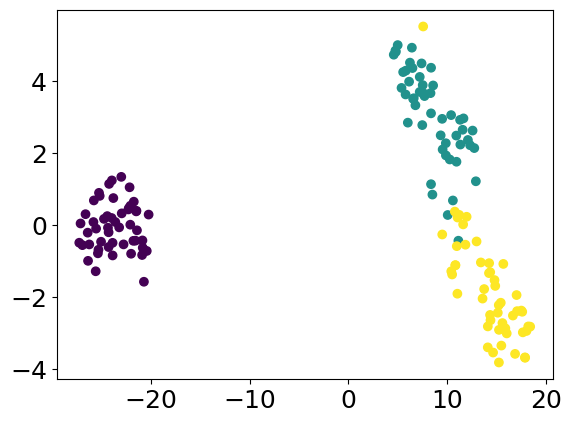

In [37]:
tsne = TSNE(n_components = 2, perplexity = 30)
X_2d = tsne.fit_transform(X)

# plotting
plt.figure()
plt.scatter(X_2d[:,0], X_2d[:,1], c = y)
plt.show()

# K-means practical

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


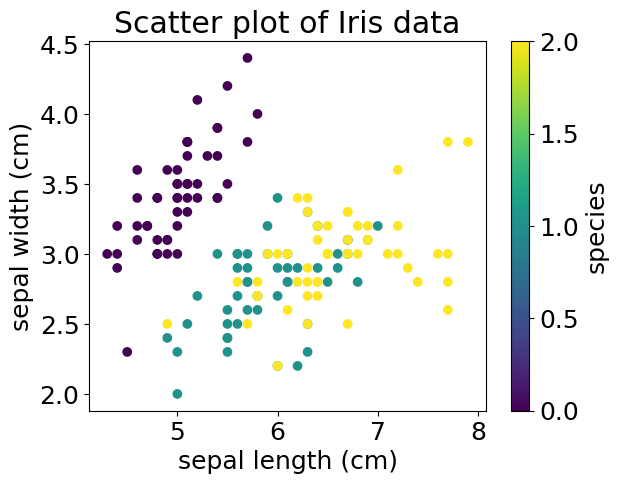

In [38]:
from sklearn.cluster import KMeans

# show the data
print(df_iris_simple.head())

# plot the data
plt.figure()
plt.scatter(X[:,0], X[:,1], c = iris.target, cmap = 'viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter plot of Iris data')
plt.colorbar(label = 'species')
plt.show()


# Normalize

# Perform k-means

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


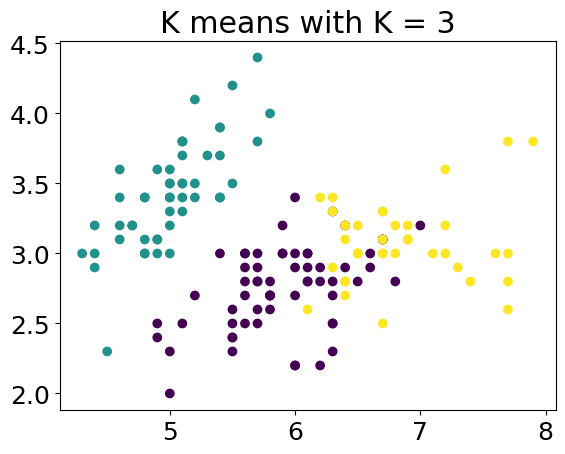

In [39]:
kmeans = KMeans(n_clusters = 3, n_init = 20)
kmeans.fit(X) # fit kmeans

# cluster assignments
print(kmeans.labels_)

# plot it
plt.figure()
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)
plt.title('K means with K = 3')
plt.show()


# Vary $K$

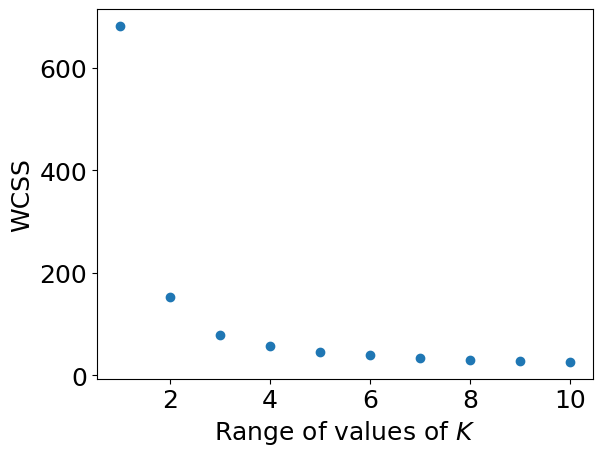

In [40]:
wcss = [] # create an empty list

# for loop to repeatedly call k-means

# range of values of k
k_range = range(1,11)

for k_var in k_range:
  #for k_init in range(10,1000)
  kmeans = KMeans(n_clusters = k_var, n_init = 20)
  kmeans.fit(X)

  # wcss values
  kmeans.inertia_

  wcss.append(kmeans.inertia_) # append to list
# end for loop

# plot figure of K vs. WCSS
plt.figure()
plt.scatter(k_range, wcss)
plt.xlabel('Range of values of $K$')
plt.ylabel('WCSS')
plt.show()


# Hierarchical clustering

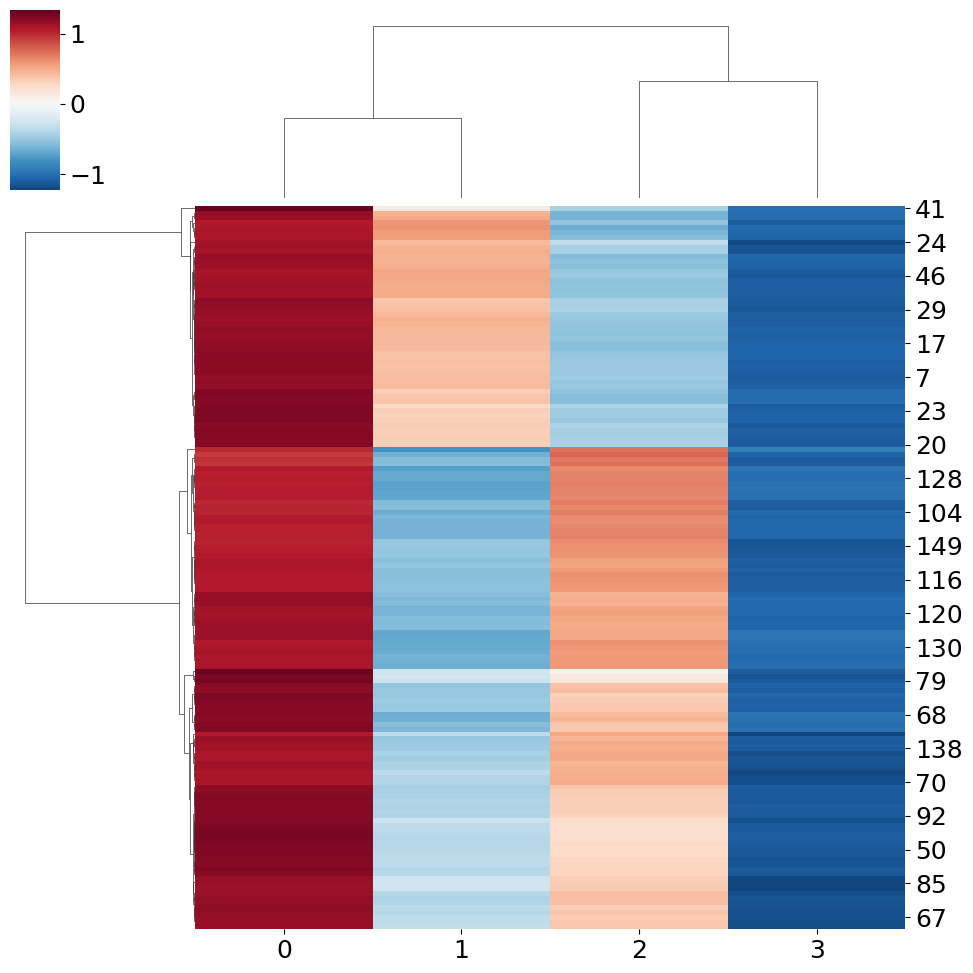

In [41]:
#from scipy.clustering.hierarchy import linkage, dendrogram
#from sklearn.cluster import AgglomerativeClustering

import seaborn as sns

sns.clustermap(X,
               method = 'average',
               metric = 'correlation',
               cmap = 'RdBu_r',
               z_score = 0,
               center = 0
               )

# Capstone project

In [44]:
from sklearn.preprocessing import MinMaxScaler

# load data
url = "https://raw.githubusercontent.com/cambiotraining/ml-unsupervised/refs/heads/main/course_files/data/diabetes_kaggle.csv"
df = pd.read_csv(url)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Normalize data

In [52]:
numeric_cols = df.select_dtypes(include = ['float64','int64']).columns

scaler = MinMaxScaler()

# make a copy of my data frame
df_normalized = df.copy()

# perform scaling and store it in data frame
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# filter out some of the values
df_filtered = df_normalized[
    (df_normalized['Glucose'] > 0.2)
]

#&
    #(df_normalized['BMI'] < 0.3)
print(df_filtered.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  


# Quick visualization

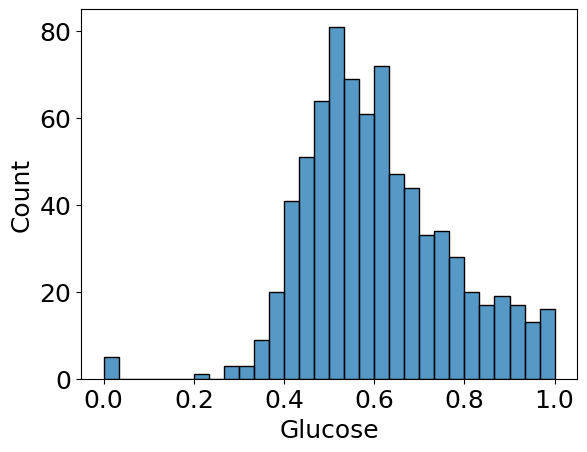

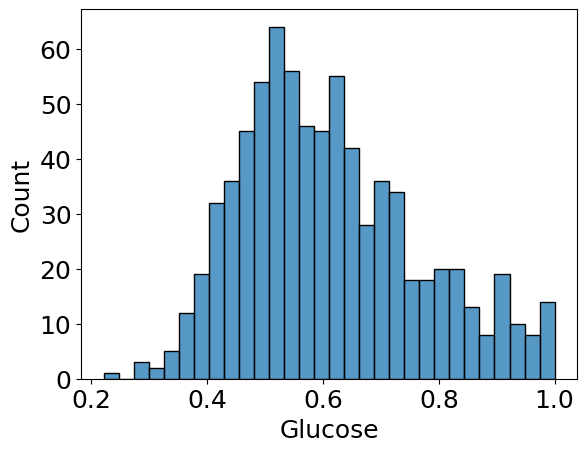

In [53]:
plt.figure()
sns.histplot(df_normalized['Glucose'], bins = 30)
plt.show()

plt.figure()
sns.histplot(df_filtered['Glucose'], bins = 30)
plt.show()

# Perform PCA

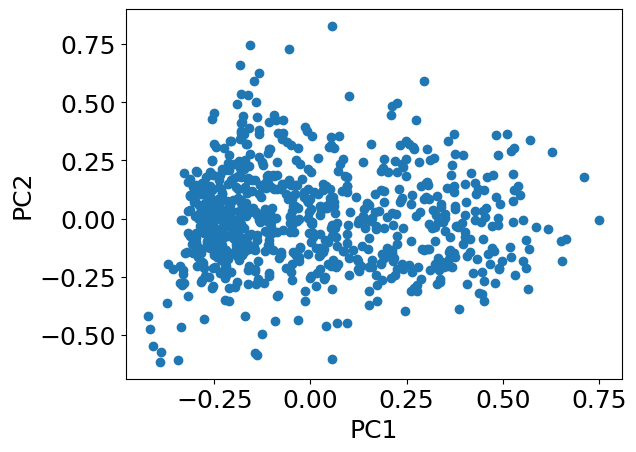

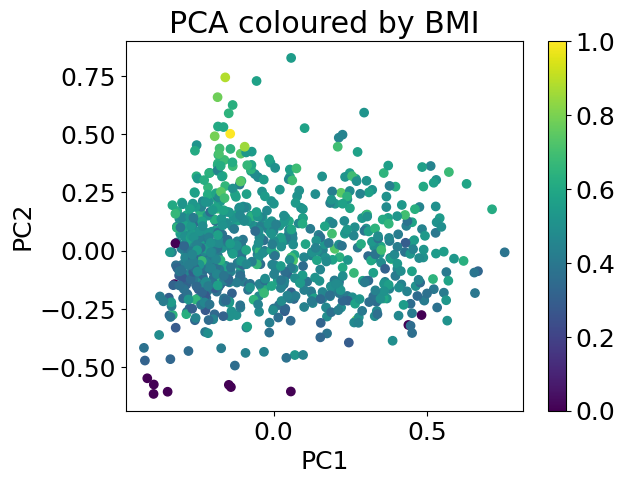

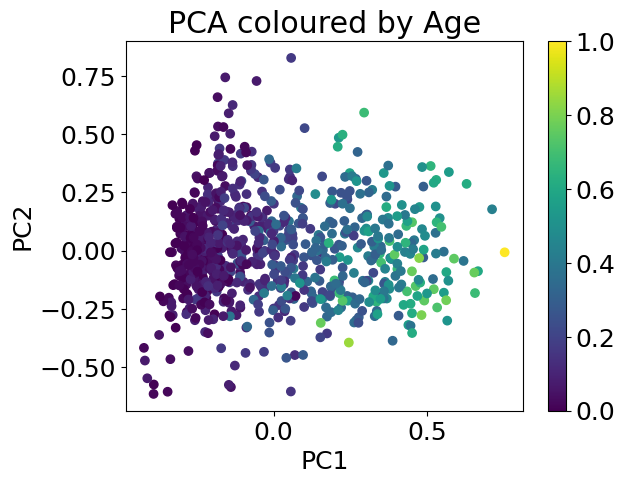

In [61]:
# drop the label diabetes column
features = df_filtered.drop(columns = ['Outcome'])
# these are normalized

# perform PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(features)

# scatter plot / PCA biplot
plt.figure()
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure()
plt.scatter(principal_components[:,0], principal_components[:,1], c = features["BMI"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA coloured by BMI')
plt.colorbar()
plt.show()

plt.figure()
plt.scatter(principal_components[:,0], principal_components[:,1], c = features["Age"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA coloured by Age')
plt.colorbar()
plt.show()

# Perform tSNE

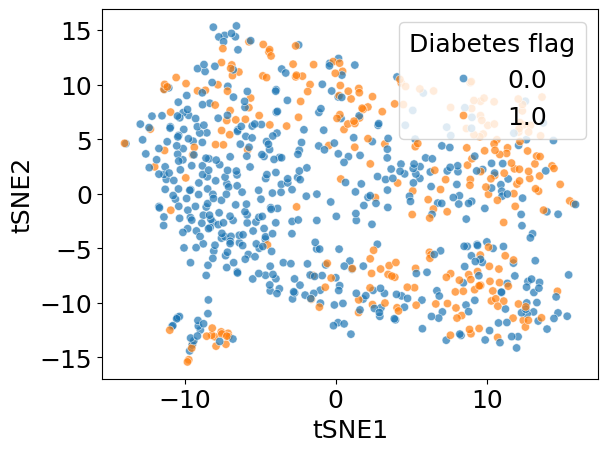

In [66]:
tsne = TSNE(n_components = 2, perplexity = 70)
tsne_results = tsne.fit_transform(features)

# create a dataframe with these results
tsne_df = pd.DataFrame(data = tsne_results,
                 columns = ['tSNE1', 'tSNE2']
                    )
# create a column with outcome variable
tsne_df['Outcome'] = df_filtered['Outcome'].values

# plot tSNE
plt.figure()
sns.scatterplot(x = 'tSNE1', y = 'tSNE2', hue = 'Outcome', data = tsne_df, alpha = 0.7)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title = 'Diabetes flag')
plt.show()

# tSNE colour by BMI

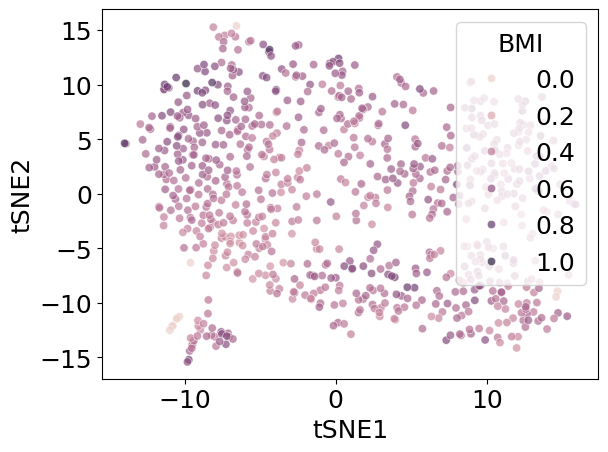

In [69]:
tsne = TSNE(n_components = 2, perplexity = 70)
tsne_results = tsne.fit_transform(features)

# create a dataframe with these results
tsne_df = pd.DataFrame(data = tsne_results,
                 columns = ['tSNE1', 'tSNE2']
                    )
# create a column with outcome variable
tsne_df['BMI'] = df_filtered['BMI'].values

# plot tSNE
plt.figure()
sns.scatterplot(x = 'tSNE1', y = 'tSNE2', hue = 'BMI', data = tsne_df, alpha = 0.7)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

# Colour by Age

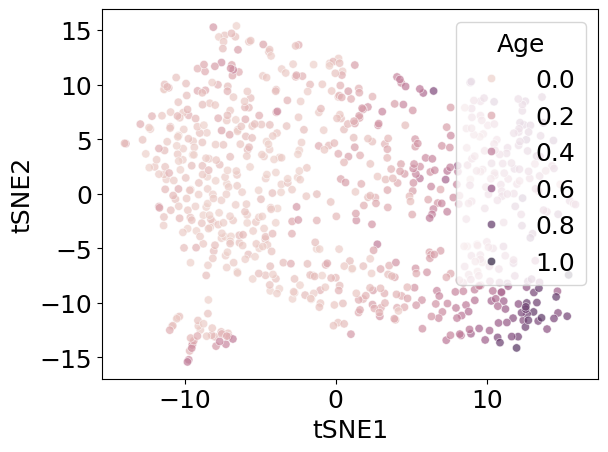

In [70]:
tsne = TSNE(n_components = 2, perplexity = 70)
tsne_results = tsne.fit_transform(features)

# create a dataframe with these results
tsne_df = pd.DataFrame(data = tsne_results,
                 columns = ['tSNE1', 'tSNE2']
                    )
# create a column with outcome variable
tsne_df['Age'] = df_filtered['Age'].values

# plot tSNE
plt.figure()
sns.scatterplot(x = 'tSNE1', y = 'tSNE2', hue = 'Age', data = tsne_df, alpha = 0.7)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()